# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [43]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/eduardo/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [44]:
df = pd.read_csv("house_prices.csv")

In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.columns[df.dtypes==int64]

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
X = df[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]
y = df['SalePrice']

## Train Test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state = 4) 

## Gradient Bossted Trees

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
reg = GradientBoostingRegressor(max_depth=4,n_estimators=100, learning_rate=0.1)

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(reg,X,y,cv=5,scoring='neg_mean_absolute_error').mean()

-16623.01999855067

## GridSearch CV GBT

In [20]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid=GridSearchCV(GradientBoostingRegressor(),
                  param_grid={'max_depth':range(4,10),'n_estimators':[100,200,500,600,1000],'learning_rate':[0.1]},
                  cv=5,
                  scoring='neg_mean_absolute_error',
                  n_jobs=-1,
                  verbose=True)

In [24]:
grid.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(4, 10), 'n_estimators': [100, 200, 500, 600, 1000], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=True)

In [25]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

In [27]:
grid.best_score_

-16456.725479004006

## Feature Processing

### Outliers

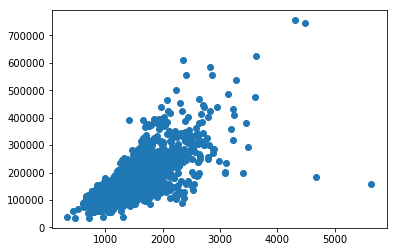

In [46]:
plt.scatter(df['GrLivArea'],df['SalePrice'])

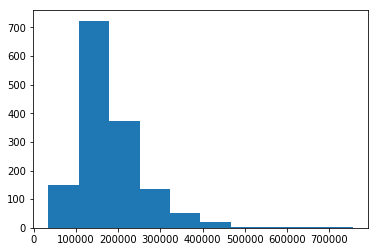

In [47]:
plt.hist(df['SalePrice']);

In [48]:
# Filtrando Outliers
df = df[df['GrLivArea']<4000]

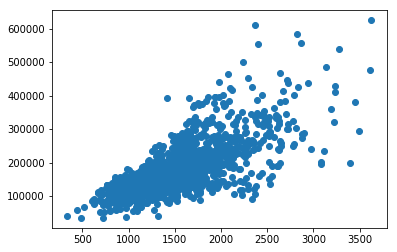

In [49]:
plt.scatter(df['GrLivArea'],df['SalePrice']);

### Multiplicative Distributions

In [50]:
df['SalePrice'] = np.log1p(df['SalePrice'])

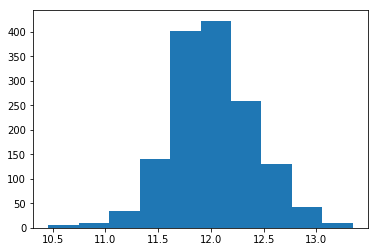

In [51]:
plt.hist(df['SalePrice']);

### Missing Values

In [52]:
df.columns[df.isnull().sum() != 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [53]:
len(df.columns[df.isnull().sum() != 0])

19

In [54]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1365
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [55]:
for col in ['GarageFinish', 'GarageCond', 'PoolQC']:
    df[col] = df[col].fillna('None')

In [56]:
for col in ['MasVnrArea']:
    df[col] = df[col].fillna('0')

In [57]:
len(df.columns[df.isnull().sum() != 0])

15

### Scaling Varaibles

In [58]:
from sklearn.preprocessing import RobustScaler

In [59]:
rbs = RobustScaler()

In [61]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [62]:
X_scale = rbs.fit_transform(X)

In [66]:
X[:1]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008


In [65]:
X_scale[:1]

array([[ 0.2       , -0.25407609,  0.5       ,  0.        ,  0.65217391,
         0.24324324,  0.45279045,  0.        , -0.55982906, -0.26965174,
        -0.45360825,  1.17307692,  0.        ,  0.38006952,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        , -1.        ,  0.        ,  0.2815735 ,  0.        ,
         0.52941176,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -1.33333333,  0.        ]])

### One Hot Encodings

In [67]:
dfb = pd.get_dummies(df)

In [68]:
len(df.columns)

81

In [69]:
len(dfb)

1456

# Pipeline

In [70]:
X_scale = rbs.fit_transform(X)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
reg = RandomForestRegressor(max_depth=4)
cross_val_score(reg,X_scale,y,cv=5,scoring='neg_mean_absolute_error').mean()

/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/skl

-24538.722212986035

In [72]:
from sklearn.pipeline import Pipeline

In [74]:
pipe = Pipeline(steps=[('scaled',RobustScaler()),('rf',RandomForestRegressor(max_depth=4))])

In [75]:
cross_val_score(pipe,X_scale,y,cv=5,scoring='neg_mean_absolute_error').mean()

/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/skl

-24111.301233755257